In [3]:
# %load plt_scat.py
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.stats import gaussian_kde, linregress # new linregress
import matplotlib.font_manager as font_manager
import cartopy
import cartopy.crs as ccrs

In [4]:
path = '/home/ck/DIR/cornkle/data/SWIFT/sem_data/data/'
lon_x = 360
#datasets
 
f2 = xr.open_dataset(path+"20190425T0000Z_SWIFT1B_km8p8ton640_regridded_allmembers.pptn_dim0.nc").sel(latitude=slice(4,20),longitude=slice(-18+lon_x,10+lon_x)) # rain

Text(0.5, 1.0, 'Rain test: Member mean input rain')

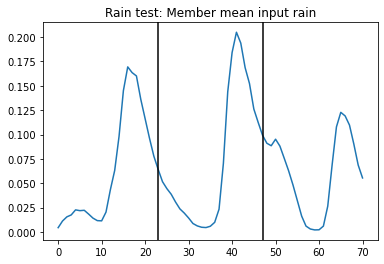

In [5]:
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(f2['stratiform_rainfall_amount'].mean('record').sel(latitude=slice(6,20),longitude=slice(-10+lon_x,10+lon_x)).mean(['latitude', 'longitude']).diff('dim0').squeeze())
ax.axvline(23, color='k')
ax.axvline(47, color='k')
plt.title('Rain test: Member mean input rain')

Text(0.5, 1.0, 'Rain test: Member mean input rain')

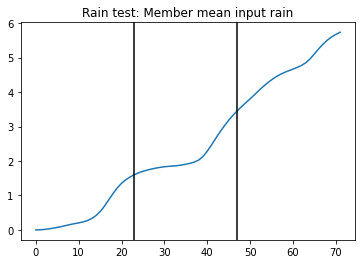

In [6]:
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(f2['stratiform_rainfall_amount'].mean('record').mean(['latitude', 'longitude']).squeeze())
ax.axvline(23, color='k')
ax.axvline(47, color='k')
plt.title('Rain test: Member mean input rain')

In [7]:
import cartopy.feature as cfeature
def draw_map(ax, ds, levels=None):

    lat = ds['latitude']
    lon = ds['longitude']

    plt.contourf(lon, lat, ds, transform=ccrs.PlateCarree(), cmap='terrain_r', extend='both', levels=levels)
    plt.colorbar()
    
    #plt.contour(lon, lat, ds['rain']/100, transform=ccrs.PlateCarree(), cmap='jet')
    
    ax.coastlines()
    ax.add_feature(cfeature.RIVERS)
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.top_labels = False
    xl.right_labels = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    

In [8]:
#pptn = f2["stratiform_rainfall_amount"][:,0:23,:,:]         # OLD CODE - ATTENTION: 0:23 selection only included rainfall up to 22:00
pptn = (f2["stratiform_rainfall_amount"][:,0:25,:,:])  # 01UTC - 00UTC

lat = f2["latitude"][:]
lon = f2["longitude"][:]


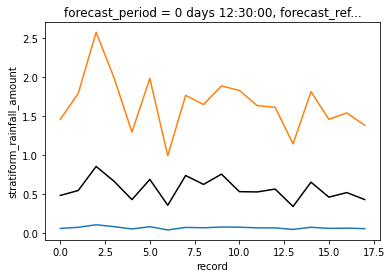

In [9]:
pptn.mean(dim='dim0').mean(['latitude','longitude']).plot(color='k')
pptn.diff('dim0').mean(dim='dim0').mean(['latitude','longitude']).plot()
pptn.isel(dim0=24).mean(['latitude','longitude']).plot()

Text(0.5, 1.0, 'Rain test: Member mean input rain')

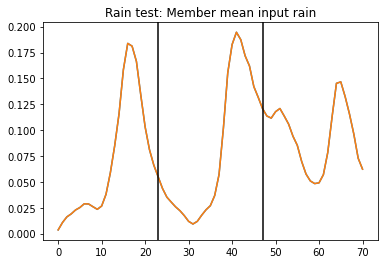

In [10]:
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(f2['stratiform_rainfall_amount'].mean(['latitude', 'longitude']).diff('dim0').mean('record').squeeze())
ax.plot(f2['stratiform_rainfall_amount'].mean('record').mean(['latitude', 'longitude']).diff('dim0').squeeze())
ax.axvline(23, color='k')
ax.axvline(47, color='k')
plt.title('Rain test: Member mean input rain')

Text(0.5, 1.0, 'Ensemble mean, hourly mean')

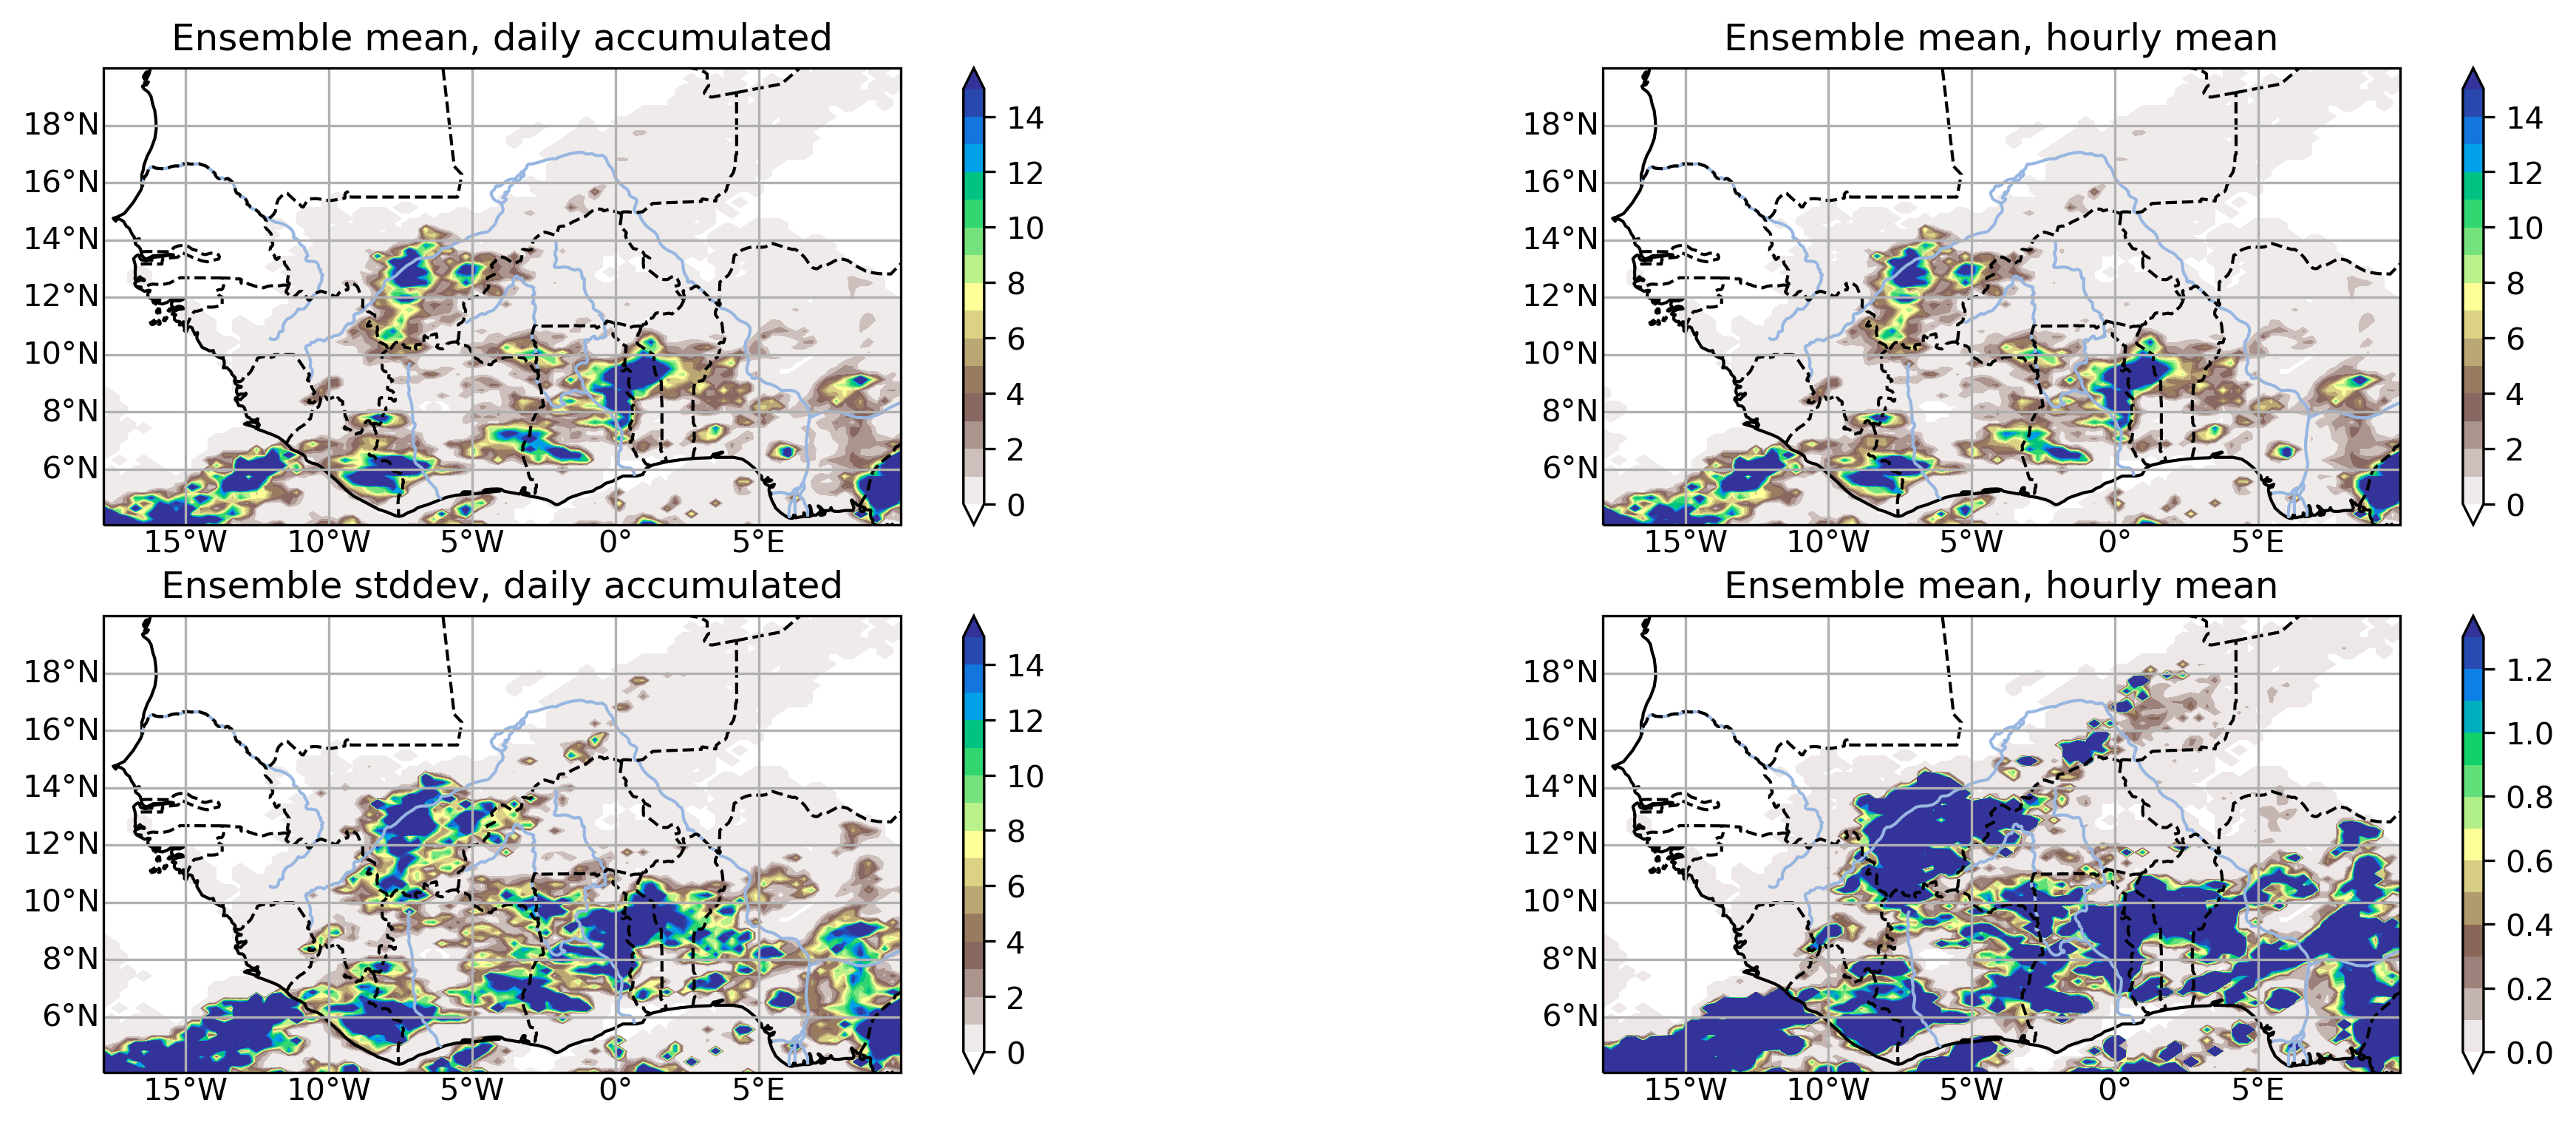

In [11]:
f = plt.figure(figsize=(16,6), dpi=300)
ax = f.add_subplot(221,projection=ccrs.PlateCarree())
draw_map(ax, pptn.isel(dim0=23).mean('record'), levels=np.arange(0,16,1))
ax.set_title('Ensemble mean, daily accumulated')

ax = f.add_subplot(222,projection=ccrs.PlateCarree())
draw_map(ax,pptn.isel(dim0=slice(0,23)).diff('dim0').sum('dim0').mean('record'), levels=np.arange(0,16,1))
ax.set_title('Ensemble mean, hourly mean')

ax = f.add_subplot(223,projection=ccrs.PlateCarree())
draw_map(ax, pptn.isel(dim0=23).std('record'), levels=np.arange(0,16,1))
ax.set_title('Ensemble stddev, daily accumulated')

ax = f.add_subplot(224,projection=ccrs.PlateCarree())
draw_map(ax, pptn.isel(dim0=slice(0,23)).mean('dim0').std('record'), levels=np.arange(0,1.4,0.1))
ax.set_title('Ensemble mean, hourly mean')

In [19]:

 
""" Apply lsm on pptn and  Calculate daily mean precipitation   """

pptn_mean = pptn.isel(dim0=23) # create 00-24UTC rainfall mean 

""" Mask dry pixels of the WHOLE day and retain the rest  (First mask)"""

mask1 = pptn_mean.any('record') > 0.01 # new dry day mask: pixels are kept if ANY member across the 18 produces accumulated rain >0.01 at a location (i.e. there is minimum potential for rain)
 
""" Mask all the pixels with any rain > 0.25mm until 1000hr"""
mask2 = pptn[:,10,:,:] < 0.25  # corrected morning rain mask, aggregating rain until 10UTC


Text(0.5, 1.0, 'Ensemble stddev, daily accumulated')

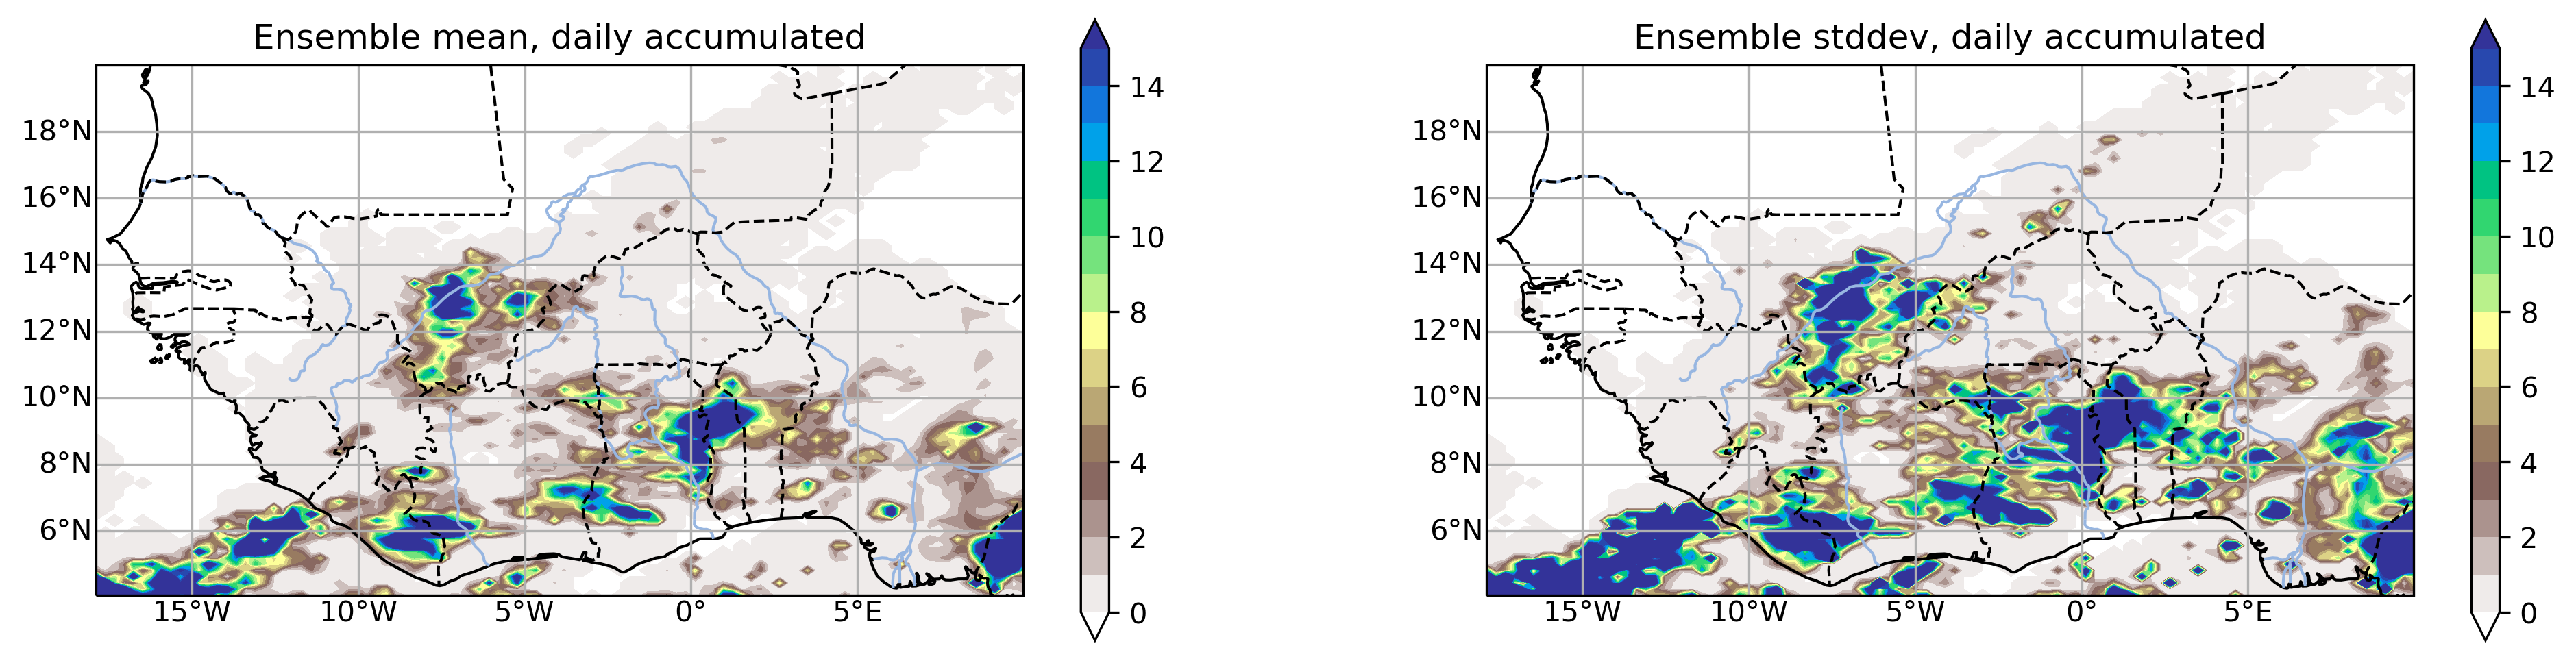

In [15]:
f = plt.figure(figsize=(16,4), dpi=300)
ax = f.add_subplot(121,projection=ccrs.PlateCarree())
draw_map(ax, pptn_mean.sel(latitude=slice(4,20),longitude=slice(-18+lon_x,10+lon_x)).mean('record'), levels=np.arange(0,16,1))
ax.set_title('Ensemble mean, daily accumulated')

ax = f.add_subplot(122,projection=ccrs.PlateCarree())
draw_map(ax, pptn_mean.sel(latitude=slice(4,20),longitude=slice(-18+lon_x,10+lon_x)).std('record'), levels=np.arange(0,16,1))
ax.set_title('Ensemble stddev, daily accumulated')

Text(0.5, 1.0, 'Member number difference 0900 to 1000UTC mask')

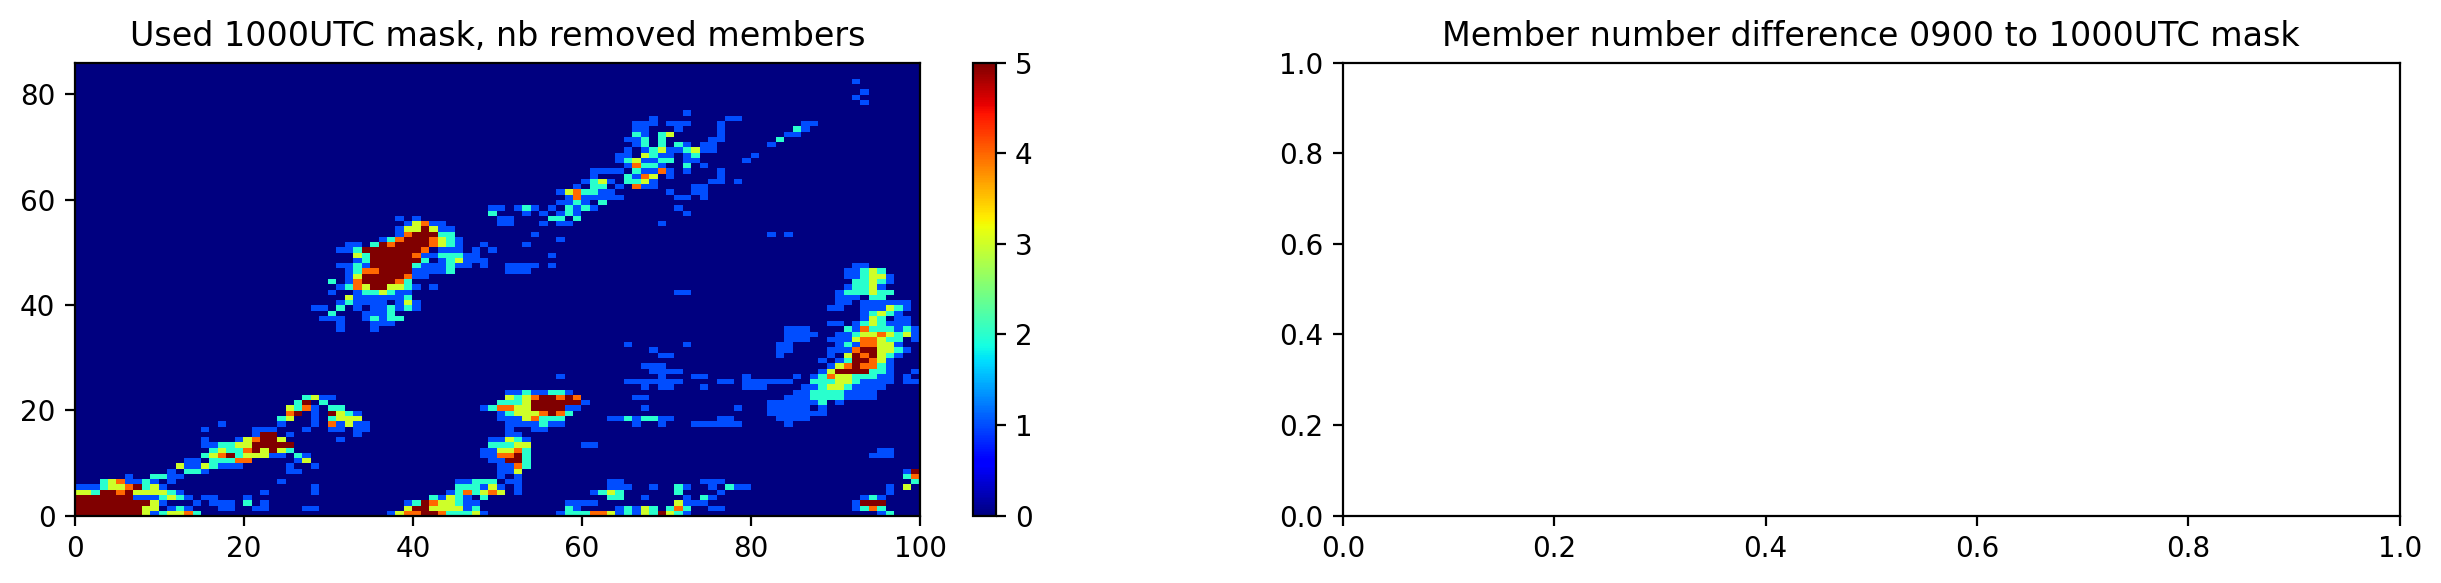

In [20]:
f = plt.figure(figsize=(15,3), dpi=200)
ax = f.add_subplot(121)
plt.pcolormesh(18-mask2.sum(axis=0), cmap='jet', vmax=5)
plt.colorbar()
plt.title('Used 1000UTC mask, nb removed members')

ax = f.add_subplot(122)
# plt.pcolormesh(old_mask2.sum(axis=0)-mask2.sum(axis=0), cmap='jet', vmax=3)
# plt.colorbar()
plt.title('Member number difference 0900 to 1000UTC mask')

Text(0.5, 1.0, 'Minimum SW reached (nb members)')

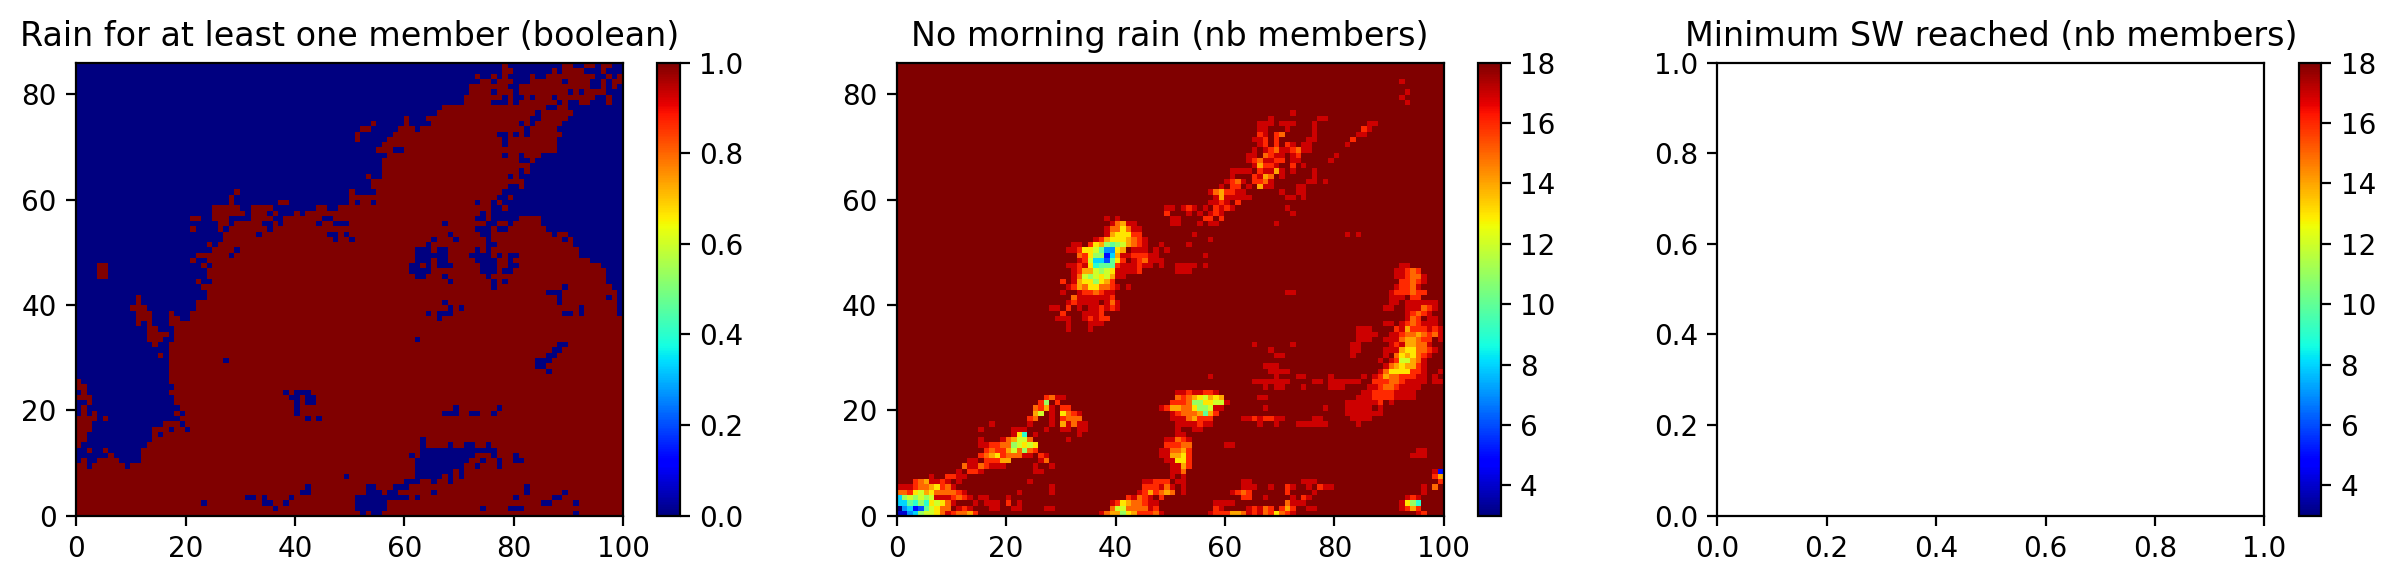

In [22]:
# ALL MASKS
############

f = plt.figure(figsize=(15,3), dpi=200)
ax = f.add_subplot(131)
plt.pcolormesh(mask1,cmap='jet')
plt.colorbar()
plt.title('Rain for at least one member (boolean)')

ax = f.add_subplot(132)
plt.pcolormesh(mask2.sum(axis=0),  cmap='jet')
plt.colorbar()
plt.title('No morning rain (nb members)')

ax = f.add_subplot(133)
#plt.pcolormesh(sw_mask.sum(axis=0), cmap='jet')
plt.colorbar()
plt.title('Minimum SW reached (nb members)')

In [28]:
# pptn_mean1 = pptn_mean.where(mask1) # dry day mask - CHANGED INPUT TO ef_lsm
 
# pptn_mean2 = pptn_mean1.where( (mask2) ) # morning rain 0.25mm mask
# pptn_mean3 = pptn_mean2.where(sw_mask) # sw 200W/m2 mask

pptn_mean1 = pptn_mean.where(mask1 & mask2)
pptn_mean3 = pptn_mean1.where(pptn_mean1.count('record')>15)


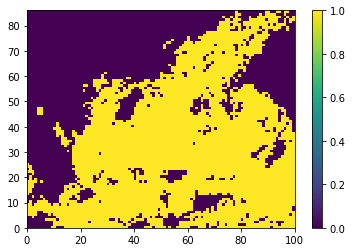

In [29]:
plt.pcolormesh(pptn_mean3.count('record')>15)
plt.colorbar()

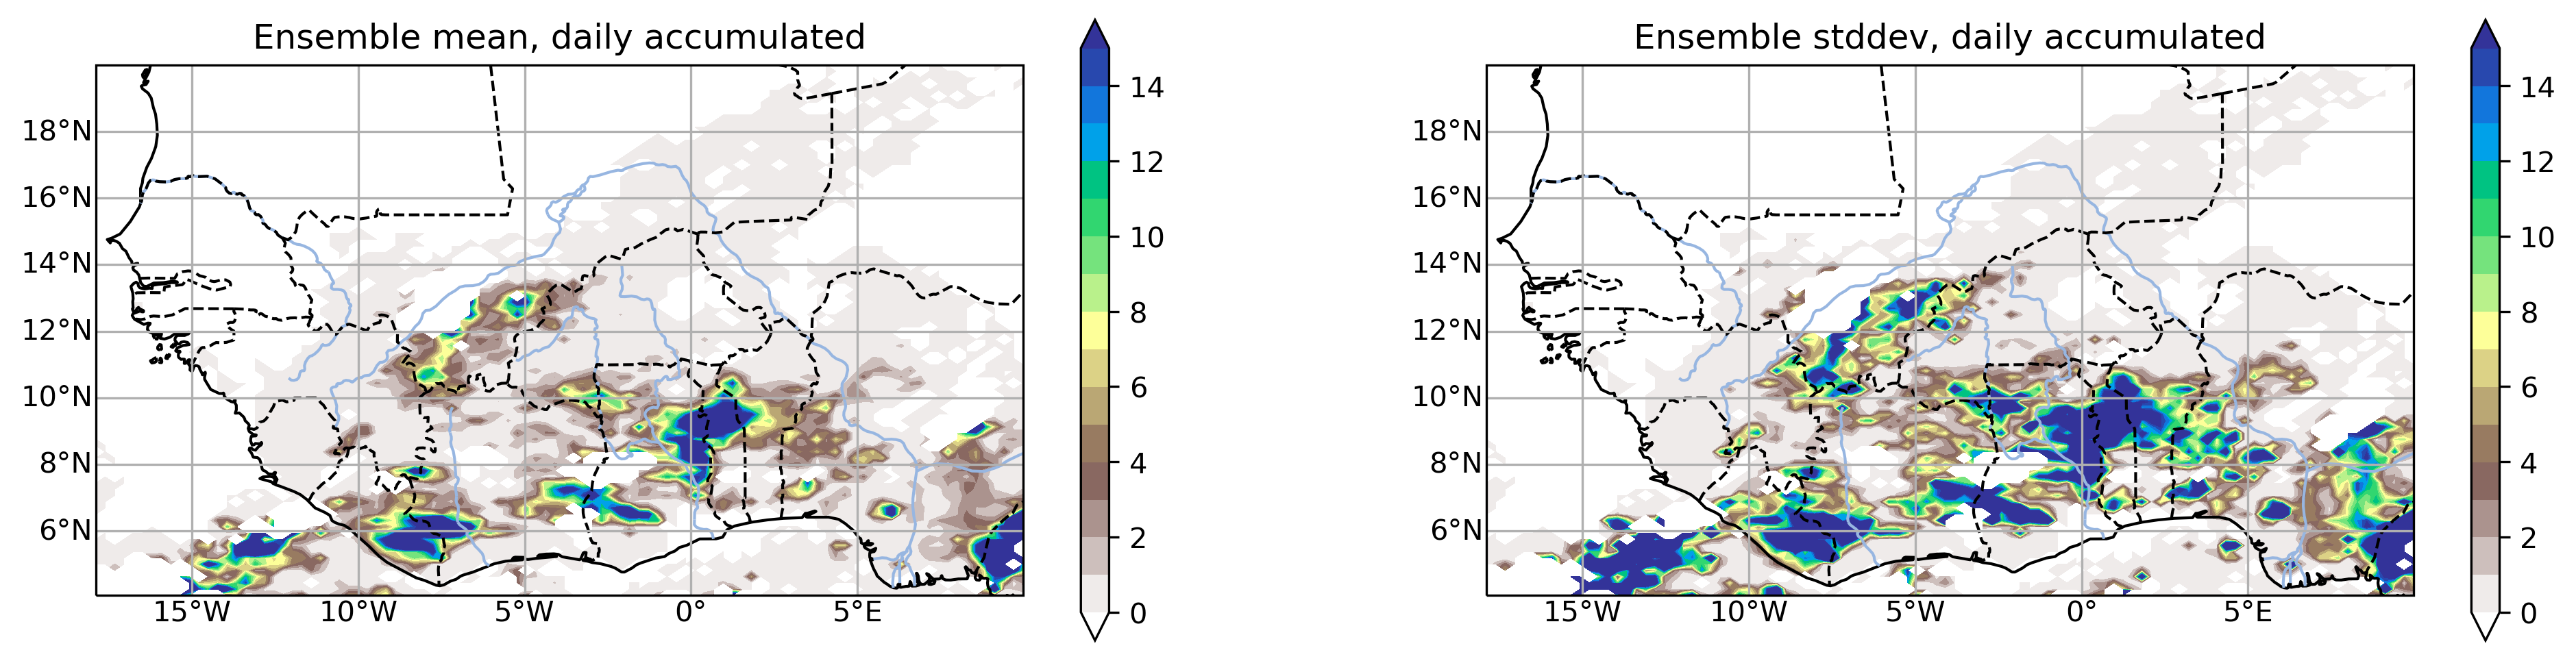

In [30]:
f = plt.figure(figsize=(16,4), dpi=300)
ax = f.add_subplot(121,projection=ccrs.PlateCarree())
draw_map(ax, pptn_mean3.sel(latitude=slice(4,20),longitude=slice(-18+lon_x,10+lon_x)).mean('record'), levels=np.arange(0,16,1))
ax.set_title('Ensemble mean, daily accumulated')

ax = f.add_subplot(122,projection=ccrs.PlateCarree())
draw_map(ax, pptn_mean3.sel(latitude=slice(4,20),longitude=slice(-18+lon_x,10+lon_x)).std('record'), levels=np.arange(0,16,1))
ax.set_title('Ensemble stddev, daily accumulated')
f.savefig('/home/ck/DIR/cornkle/figs/SWIFT/semenea/stddev_test_GLOBgrid.jpg')

In [31]:
import cartopy.feature as cfeature
def draw_map(ax, ds, levels=None):

    lat = ds['latitude']
    lon = ds['longitude']

    plt.contourf(lon, lat, ds, transform=ccrs.PlateCarree(), cmap='terrain_r', extend='both', levels=levels)
    plt.colorbar()
    
    #plt.contour(lon, lat, ds['rain']/100, transform=ccrs.PlateCarree(), cmap='jet')
    
    ax.coastlines()
    ax.add_feature(cfeature.RIVERS)
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.top_labels = False
    xl.right_labels = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

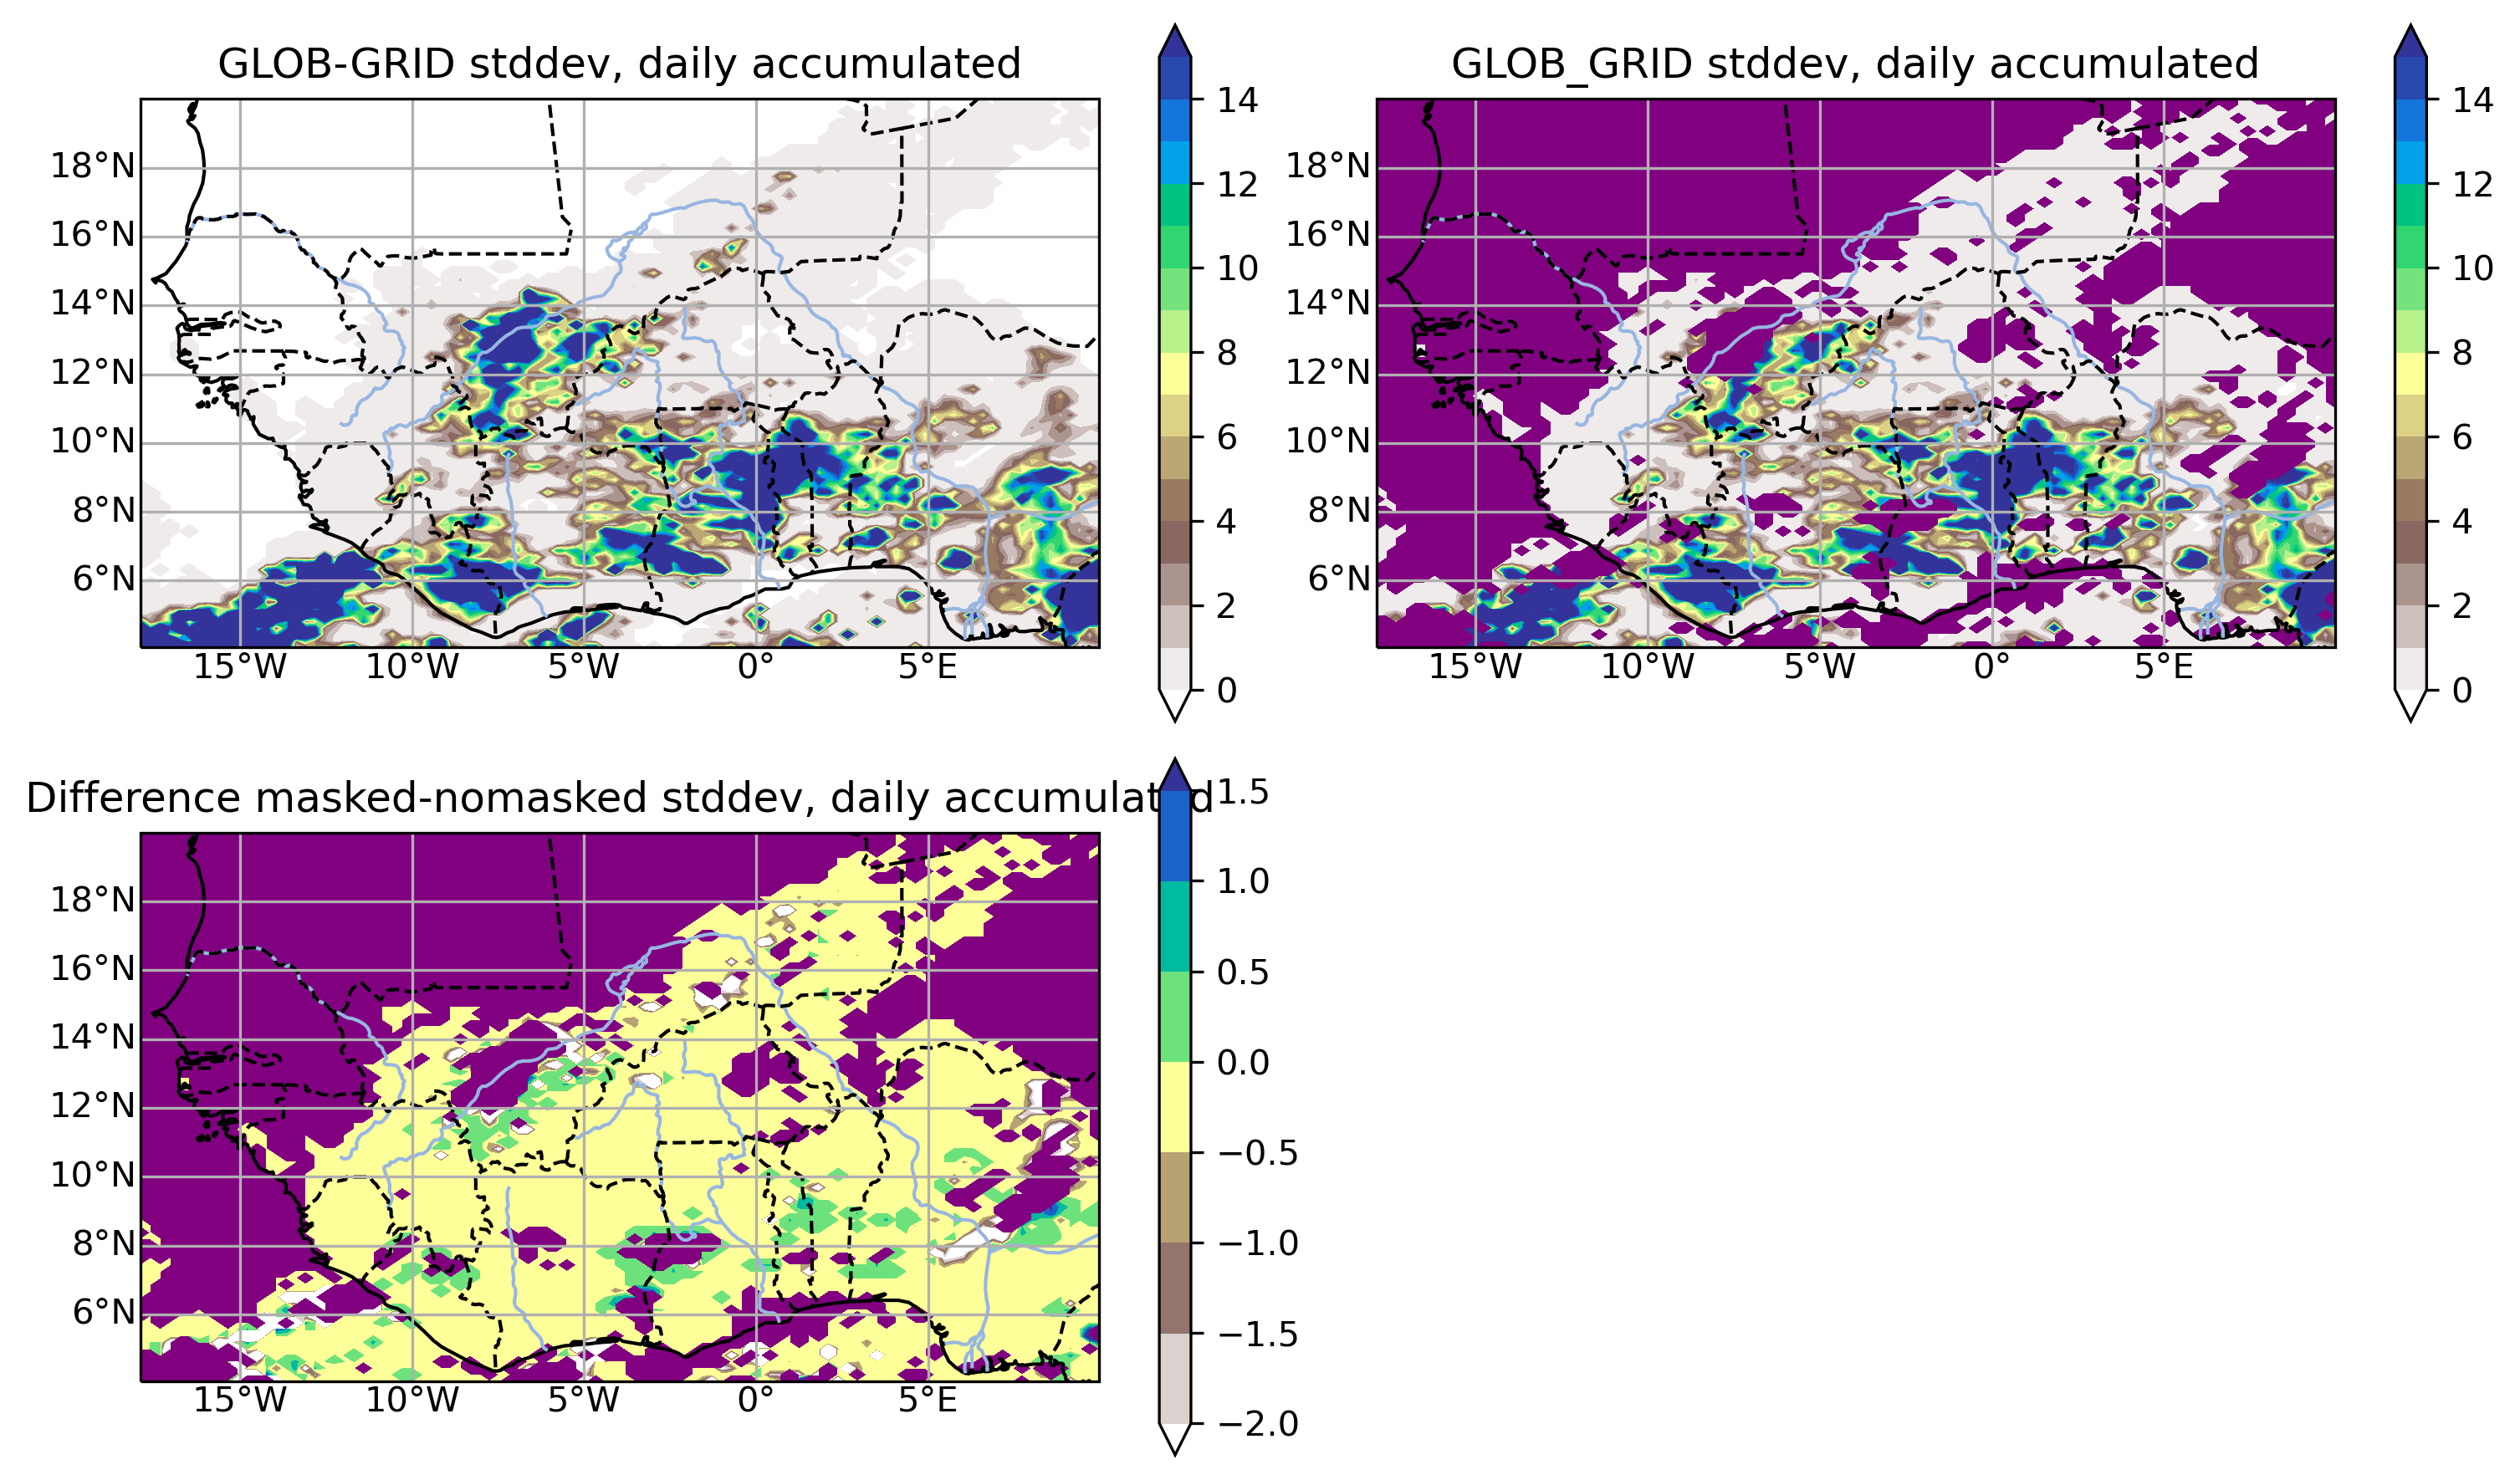

In [32]:
f = plt.figure(figsize=(10,6), dpi=300)
ax = f.add_subplot(221,projection=ccrs.PlateCarree())
draw_map(ax, pptn_mean.sel(latitude=slice(4,20),longitude=slice(-18+lon_x,10+lon_x)).std('record'), levels=np.arange(0,16,1))
ax.set_title('GLOB-GRID stddev, daily accumulated')

ax = f.add_subplot(222,projection=ccrs.PlateCarree())
draw_map(ax, pptn_mean3.sel(latitude=slice(4,20),longitude=slice(-18+lon_x,10+lon_x)).std('record'), levels=np.arange(0,16,1))
ax.set_title('GLOB_GRID stddev, daily accumulated')
ax.set_facecolor('purple')

ax = f.add_subplot(223,projection=ccrs.PlateCarree())
draw_map(ax, pptn_mean3.sel(latitude=slice(4,20),longitude=slice(-18+lon_x,10+lon_x)).std('record')-pptn_mean.sel(latitude=slice(4,20),longitude=slice(-18+lon_x,10+lon_x)).std('record'), levels=np.arange(-2,2,0.5))
ax.set_title('Difference masked-nomasked stddev, daily accumulated')
ax.set_facecolor('purple')
plt.tight_layout()
f.savefig('/home/ck/DIR/cornkle/figs/SWIFT/semenea/stddev_testdiff_globgrid.jpg')